In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# Define the source folder containing the subfolders
source_folder = "/content/drive/MyDrive/Dataset_epilepsy"

# Initialize an empty list to store EEG data
eeg_data_list = []

# Initialize an empty list to store target values
target_list = []

# Iterate over the subfolders
for folder_name in ["Z", "F", "N", "O", "S"]:
    folder_path = os.path.join(source_folder, folder_name)
    # Iterate over the files in the subfolder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # Read EEG data from the text file
        with open(file_path, 'r') as file:
            lines = file.readlines()
            eeg_data = [float(value) for line in lines for value in line.strip().split()]
            # Ensure the EEG data has 4096 elements
            eeg_data = eeg_data[:4096] if len(eeg_data) >= 4096 else eeg_data + [0.0] * (4096 - len(eeg_data))
            # Append EEG data to the list
            eeg_data_list.append(eeg_data)
            # Append target value to the list
            target_list.append(folder_name)

# Create DataFrame from EEG data
eeg_df = pd.DataFrame(eeg_data_list)

# Add target column
eeg_df['target'] = target_list

# Write DataFrame to CSV
csv_file_path = "combined_eeg_data.csv"
eeg_df.to_csv(csv_file_path, index=False)

print("CSV file saved to:", csv_file_path)


CSV file saved to: combined_eeg_data.csv


In [ ]:
df=pd.read_csv(csv_file_path)
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,-87.0,-89.0,-73.0,-69.0,-51.0,-48.0,-51.0,-47.0,-30.0,-6.0,...,-3.0,-21.0,-22.0,-15.0,9.0,32.0,37.0,18.0,7.0,Z
1,40.0,48.0,35.0,5.0,-40.0,-54.0,-32.0,6.0,36.0,56.0,...,-52.0,-52.0,-45.0,-36.0,-44.0,-40.0,-38.0,-34.0,-27.0,Z
2,-56.0,-50.0,-64.0,-91.0,-135.0,-140.0,-134.0,-114.0,-115.0,-126.0,...,-63.0,-82.0,-114.0,-138.0,-159.0,-172.0,-180.0,-173.0,-162.0,Z
3,-37.0,-22.0,-17.0,-24.0,-31.0,-20.0,-5.0,14.0,31.0,31.0,...,-91.0,-52.0,-23.0,-14.0,-5.0,-3.0,7.0,3.0,4.0,Z
4,-31.0,-43.0,-39.0,-39.0,-9.0,-5.0,18.0,7.0,-12.0,-42.0,...,-32.0,-32.0,-40.0,-23.0,-1.0,11.0,12.0,-6.0,10.0,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100.0,124.0,153.0,185.0,210.0,220.0,216.0,222.0,240.0,265.0,...,250.0,137.0,57.0,17.0,0.0,7.0,26.0,57.0,95.0,S
496,-310.0,93.0,494.0,789.0,798.0,552.0,202.0,-95.0,-262.0,-327.0,...,437.0,345.0,108.0,-216.0,-525.0,-735.0,-847.0,-721.0,-491.0,S
497,-88.0,-115.0,-140.0,-159.0,-164.0,-161.0,-144.0,-123.0,-93.0,-59.0,...,200.0,180.0,165.0,156.0,156.0,153.0,150.0,146.0,140.0,S
498,176.0,186.0,189.0,198.0,205.0,213.0,223.0,231.0,234.0,236.0,...,132.0,122.0,115.0,106.0,104.0,100.0,98.0,101.0,99.0,S


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,23.0,17.0,10.0,10.0,7.0,-5.0,-6.0,-13.0,-19.0,-26.0,...,5.0,8.0,13.0,16.0,24.0,34.0,42.0,41.0,39.0,F
1,-30.0,-34.0,-33.0,5.0,31.0,62.0,69.0,36.0,1.0,-29.0,...,31.0,-9.0,-37.0,-48.0,-18.0,-3.0,3.0,1.0,-20.0,Z
2,-44.0,-35.0,-18.0,2.0,-5.0,2.0,-7.0,-20.0,-1.0,-1.0,...,10.0,-3.0,-32.0,-2.0,31.0,43.0,65.0,44.0,55.0,Z
3,76.0,57.0,7.0,-65.0,-103.0,-111.0,-138.0,-120.0,-89.0,-68.0,...,2.0,-81.0,-118.0,-132.0,-154.0,-173.0,-171.0,-143.0,-145.0,O
4,-26.0,1.0,29.0,41.0,33.0,2.0,-31.0,-60.0,-81.0,-99.0,...,-288.0,-254.0,-220.0,-200.0,-201.0,-205.0,-209.0,-207.0,-210.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,224.0,199.0,149.0,67.0,-37.0,-133.0,-193.0,-206.0,-197.0,-164.0,...,43.0,26.0,3.0,-27.0,-48.0,-63.0,-65.0,-56.0,-56.0,S
496,29.0,20.0,-8.0,-39.0,-74.0,-97.0,-103.0,-95.0,-68.0,-41.0,...,-28.0,16.0,53.0,66.0,68.0,71.0,64.0,55.0,33.0,O
497,-134.0,-116.0,-87.0,-73.0,-78.0,-93.0,-122.0,-139.0,-141.0,-120.0,...,8.0,-13.0,-42.0,-69.0,-105.0,-134.0,-143.0,-142.0,-129.0,O
498,-11.0,-11.0,-14.0,-18.0,-19.0,-22.0,-20.0,-22.0,-19.0,-16.0,...,27.0,29.0,34.0,44.0,44.0,45.0,44.0,39.0,25.0,F


In [ ]:
df['target'] = df['target'].replace({'Z': 0, 'F': 1, 'N': 2, 'O': 3, 'S': 4})
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,23.0,17.0,10.0,10.0,7.0,-5.0,-6.0,-13.0,-19.0,-26.0,...,5.0,8.0,13.0,16.0,24.0,34.0,42.0,41.0,39.0,1
1,-30.0,-34.0,-33.0,5.0,31.0,62.0,69.0,36.0,1.0,-29.0,...,31.0,-9.0,-37.0,-48.0,-18.0,-3.0,3.0,1.0,-20.0,0
2,-44.0,-35.0,-18.0,2.0,-5.0,2.0,-7.0,-20.0,-1.0,-1.0,...,10.0,-3.0,-32.0,-2.0,31.0,43.0,65.0,44.0,55.0,0
3,76.0,57.0,7.0,-65.0,-103.0,-111.0,-138.0,-120.0,-89.0,-68.0,...,2.0,-81.0,-118.0,-132.0,-154.0,-173.0,-171.0,-143.0,-145.0,3
4,-26.0,1.0,29.0,41.0,33.0,2.0,-31.0,-60.0,-81.0,-99.0,...,-288.0,-254.0,-220.0,-200.0,-201.0,-205.0,-209.0,-207.0,-210.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,224.0,199.0,149.0,67.0,-37.0,-133.0,-193.0,-206.0,-197.0,-164.0,...,43.0,26.0,3.0,-27.0,-48.0,-63.0,-65.0,-56.0,-56.0,4
496,29.0,20.0,-8.0,-39.0,-74.0,-97.0,-103.0,-95.0,-68.0,-41.0,...,-28.0,16.0,53.0,66.0,68.0,71.0,64.0,55.0,33.0,3
497,-134.0,-116.0,-87.0,-73.0,-78.0,-93.0,-122.0,-139.0,-141.0,-120.0,...,8.0,-13.0,-42.0,-69.0,-105.0,-134.0,-143.0,-142.0,-129.0,3
498,-11.0,-11.0,-14.0,-18.0,-19.0,-22.0,-20.0,-22.0,-19.0,-16.0,...,27.0,29.0,34.0,44.0,44.0,45.0,44.0,39.0,25.0,1


In [ ]:
missing_values = df.isnull().sum()
missing_values


0         0
1         0
2         0
3         0
4         0
         ..
4092      0
4093      0
4094      0
4095      0
target    0
Length: 4097, dtype: int64

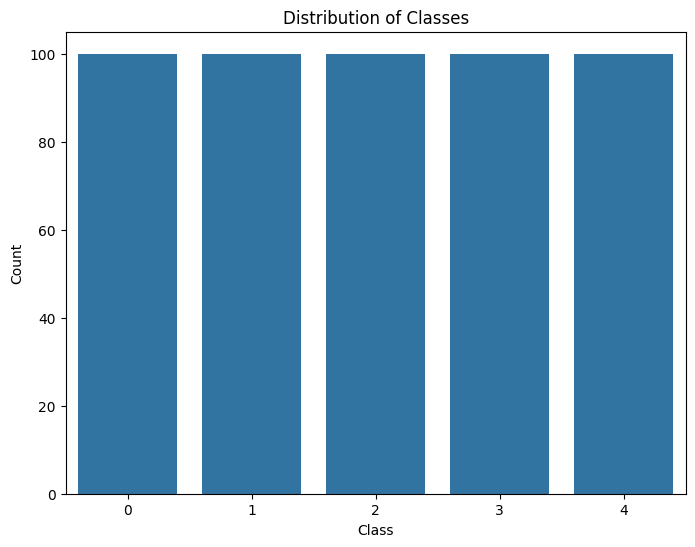

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = df['target'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 4096)
y_train shape: (400,)
X_test shape: (100, 4096)
y_test shape: (100,)


In [ ]:
from keras.utils import to_categorical
num_classes=5
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

In [ ]:
from tensorflow.keras import layers, Model
def CNN(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv1D(64, 3, activation='relu')(inputs)
    x = layers.MaxPooling1D(2)(x)
    x = layers.Conv1D(128, 3, activation='relu')(x)
    x = layers.MaxPooling1D(2)(x)
    x = layers.Conv1D(256, 3, activation='relu')(x)
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)  # Use softmax activation for multiclass classification
    model = Model(inputs, outputs)
    return model

input_shape = (4096, 1)
num_classes = 5

cnn_model = CNN(input_shape, num_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

cnn_history = cnn_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test_encoded)
print("CNN Model Accuracy:", cnn_accuracy)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 4096, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 4094, 64)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2047, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2045, 128)           │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1022, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1020, 256)           │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,805 (487.52 KB)

 Trainable params: 124,805 (487.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.2077 - loss: 13.2370 - val_accuracy: 0.1750 - val_loss: 6.7046
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2509 - loss: 5.3121 - val_accuracy: 0.4125 - val_loss: 3.4645
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3706 - loss: 2.5870 - val_accuracy: 0.3125 - val_loss: 1.7821
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3167 - loss: 1.5905 - val_accuracy: 0.2625 - val_loss: 1.3520
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4066 - loss: 1.2614 - val_accuracy: 0.3500 - val_loss: 1.2789
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4483 - loss: 1.1794 - val_accuracy: 0.3375 - val_loss: 1.2532
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4059 - loss: 1.1540 - val_accuracy: 0.4625 - val_loss: 1.2155
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5037 - loss: 1.1278 - val_accuracy: 0.5500 -

In [ ]:
def LSTM(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.LSTM(64, return_sequences=True)(inputs)  # First LSTM layer
    x = layers.LSTM(64, return_sequences=True)(x)  # Second LSTM layer
    x = layers.LSTM(64, return_sequences=True)(x)  # Third LSTM layer
    x = layers.LSTM(64, return_sequences=True)(x)  # Fourth LSTM layer
    x = layers.LSTM(64)(x)  # Fifth LSTM layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

lstm_model = LSTM(input_shape, num_classes)
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

lstm_history = lstm_model.fit(X_train, y_train_encoded, epochs=25, batch_size=32, validation_split=0.2)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test_encoded)
print("LSTM Model Accuracy:", lstm_accuracy)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 4096, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 4096, 64)            │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 4096, 64)            │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 4096, 64)            │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 4096, 64)            │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,317 (583.27 KB)

 Trainable params: 149,317 (583.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 638ms/step - accuracy: 0.2454 - loss: 1.5829 - val_accuracy: 0.3500 - val_loss: 1.4356
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 537ms/step - accuracy: 0.4138 - loss: 1.3355 - val_accuracy: 0.4000 - val_loss: 1.2802
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 531ms/step - accuracy: 0.4358 - loss: 1.2589 - val_accuracy: 0.3625 - val_loss: 1.2467
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 611ms/step - accuracy: 0.4767 - loss: 1.1554 - val_accuracy: 0.4250 - val_loss: 1.2071
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 583ms/step - accuracy: 0.4373 - loss: 1.1939 - val_accuracy: 0.3625 - val_loss: 1.3106
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 546ms/step - accuracy: 0.4988 - loss: 1.1857 - val_accuracy: 0.4250 - val_loss: 1.1575
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 627ms/step - accuracy: 0.5348 - loss: 1.0077 - val_accuracy: 0.4625 - val_loss: 1.1358
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 537ms/step - accuracy: 0.5418 - loss: 1.0033 - val_accuracy

In [ ]:
def BiLSTM(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Bidirectional(layers.LSTM(64))(inputs)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

bilstm_model = BiLSTM(input_shape, num_classes)
bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bilstm_model.summary()

bilstm_history = bilstm_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)
bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_test, y_test_encoded)
print("BiLSTM Model Accuracy:", bilstm_accuracy)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 4096, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,437 (134.52 KB)

 Trainable params: 34,437 (134.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.2101 - loss: 1.7342 - val_accuracy: 0.2875 - val_loss: 1.4994
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.3383 - loss: 1.4716 - val_accuracy: 0.3250 - val_loss: 1.4329
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - accuracy: 0.4567 - loss: 1.3737 - val_accuracy: 0.3750 - val_loss: 1.3865
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.5222 - loss: 1.2901 - val_accuracy: 0.3250 - val_loss: 1.3620
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.5284 - loss: 1.2433 - val_accuracy: 0.3375 - val_loss: 1.3309
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.5617 - loss: 1.1420 - val_accuracy: 0.3375 - val_loss: 1.3046
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.5880 - loss: 1.0869 - val_accuracy: 0.3375 - val_loss: 1.2958
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.6033 - loss: 1.0600 - val_accuracy: 0.

In [ ]:
from tensorflow import keras
from tensorflow.keras import regularizers

def BiLSTM(input_shape, num_classes, use_dropout=False, dropout_rate=0.2, use_l1_l2=False, l1=1e-5, l2=1e-5):
  inputs = keras.Input(shape=input_shape)
  x = layers.Bidirectional(layers.LSTM(64, return_sequences=True), merge_mode='concat')(inputs)
  if use_dropout:
    x = layers.Dropout(dropout_rate)(x)
  if use_l1_l2:
    kernel_regularizer = regularizers.l1_l2(l1=l1, l2=l2)
  else:
    kernel_regularizer = None
  x = layers.LSTM(64, kernel_regularizer=kernel_regularizer)(x)
  outputs = layers.Dense(num_classes, activation='softmax')(x)
  model = Model(inputs, outputs)
  return model

bilstm_model = BiLSTM(input_shape, num_classes)
bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bilstm_model.summary()

bilstm_history = bilstm_model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)
bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_test, y_test_encoded)
print("BiLSTM Model Accuracy:", bilstm_accuracy)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 4096, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 4096, 128)           │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,525 (326.27 KB)

 Trainable params: 83,525 (326.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 378ms/step - accuracy: 0.2072 - loss: 1.6269 - val_accuracy: 0.3125 - val_loss: 1.5124
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - accuracy: 0.4304 - loss: 1.3933 - val_accuracy: 0.3500 - val_loss: 1.3591
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 333ms/step - accuracy: 0.4743 - loss: 1.2192 - val_accuracy: 0.3750 - val_loss: 1.2729
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.4837 - loss: 1.1858 - val_accuracy: 0.3375 - val_loss: 1.2907
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.5643 - loss: 1.0493 - val_accuracy: 0.4250 - val_loss: 1.2293
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 332ms/step - accuracy: 0.5340 - loss: 1.0498 - val_accuracy: 0.4250 - val_loss: 1.1797
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step - accuracy: 0.6097 - loss: 0.9440 - val_accuracy: 0.4625 - val_loss: 1.1677
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.5848 - loss: 0.9009 - val_accuracy: 0.

In [ ]:
def GRUModel(input_shape, num_classes):
  inputs = layers.Input(shape=input_shape)
  x = layers.GRU(64, return_sequences=True)(inputs)
  x = layers.GRU(32, return_sequences=True)(x)
  x = layers.GRU(64)(x)
  outputs = layers.Dense(num_classes, activation='softmax')(x)
  model = Model(inputs, outputs)
  return model


gru_model = GRUModel(input_shape, num_classes)
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
gru_model.summary()

gru_history = gru_model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test_encoded)
print("GRU Model Accuracy:", gru_accuracy)

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 4096, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 4096, 64)            │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 4096, 32)            │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_8 (GRU)                          │ (None, 64)                  │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,413 (161.77 KB)

 Trainable params: 41,413 (161.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step - accuracy: 0.2941 - loss: 1.5640 - val_accuracy: 0.2875 - val_loss: 1.5297
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 548ms/step - accuracy: 0.3760 - loss: 1.3775 - val_accuracy: 0.3750 - val_loss: 1.3618
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - accuracy: 0.4586 - loss: 1.2792 - val_accuracy: 0.3250 - val_loss: 1.3150
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.4442 - loss: 1.2033 - val_accuracy: 0.4125 - val_loss: 1.2912
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 0.5422 - loss: 1.1668 - val_accuracy: 0.3125 - val_loss: 1.2849
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - accuracy: 0.5268 - loss: 1.1198 - val_accuracy: 0.3500 - val_loss: 1.3072
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - accuracy: 0.4920 - loss: 1.1213 - val_accuracy: 0.4000 - val_loss: 1.2283
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 421ms/step - accuracy: 0.5837 - loss: 0.9940 - val_accuracy: 0.

In [ ]:
def BiGRUModel(input_shape, num_classes, use_dropout=False, dropout_rate=0.2, use_l1_l2=False, l1=1e-5, l2=1e-5):
  inputs = layers.Input(shape=input_shape)
  x = layers.Bidirectional(layers.GRU(64, return_sequences=True), merge_mode='concat')(inputs)
  if use_dropout:
    x = layers.Dropout(dropout_rate)(x)
  if use_l1_l2:
    kernel_regularizer = regularizers.l1_l2(l1=l1, l2=l2)
  else:
    kernel_regularizer = None
  x = layers.GRU(64, return_sequences=False, kernel_regularizer=kernel_regularizer)(x)
  outputs = layers.Dense(num_classes, activation='softmax')(x)
  model = Model(inputs, outputs)
  return model

gru_model = GRUModel(input_shape, num_classes)
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
gru_model.summary()

gru_history = gru_model.fit(X_train, y_train_encoded, epochs=75, batch_size=32, validation_split=0.2)
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test_encoded)
print("GRU Model Accuracy:", gru_accuracy)

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 4096, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_15 (GRU)                         │ (None, 4096, 64)            │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_16 (GRU)                         │ (None, 4096, 32)            │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_17 (GRU)                         │ (None, 64)                  │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,413 (161.77 KB)

 Trainable params: 41,413 (161.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 457ms/step - accuracy: 0.3180 - loss: 1.5301 - val_accuracy: 0.3125 - val_loss: 1.5239
Epoch 2/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 425ms/step - accuracy: 0.4156 - loss: 1.3988 - val_accuracy: 0.3000 - val_loss: 1.4427
Epoch 3/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 0.4304 - loss: 1.2654 - val_accuracy: 0.2875 - val_loss: 1.3759
Epoch 4/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - accuracy: 0.4181 - loss: 1.2325 - val_accuracy: 0.3625 - val_loss: 1.3367
Epoch 5/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - accuracy: 0.4685 - loss: 1.2145 - val_accuracy: 0.3250 - val_loss: 1.3304
Epoch 6/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 344ms/step - accuracy: 0.5195 - loss: 1.1172 - val_accuracy: 0.3375 - val_loss: 1.3239
Epoch 7/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 371ms/step - accuracy: 0.5070 - loss: 1.1054 - val_accuracy: 0.3500 - val_loss: 1.3076
Epoch 8/75
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.5313 - loss: 1.0782 - val_accuracy: 0.

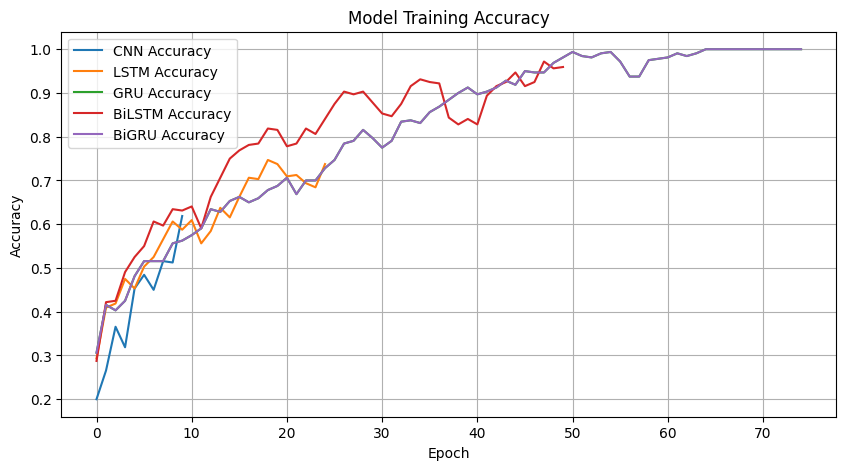

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(cnn_history.history['accuracy'], label='CNN Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Accuracy')
plt.plot(bilstm_history.history['accuracy'], label='BiLSTM Accuracy')
plt.plot(gru_history.history['accuracy'],label='BiGRU Accuracy')
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()